## Lab 5 ACS Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from oct2py import Oct2Py
oc = Oct2Py()


script = "function y = myScript(x)\n" \
         "    y = x-5" \
         "end"

with open("myScript.m","w+") as f:
    f.write(script)

oc.myScript(7)

OSError: octave-cli not found, please see README

In [2]:
def rip_in_acs_data(fn):
    acs_data = pd.read_csv(fn)
    a_wavelengths = acs_data.iloc[:1][' a'].apply(lambda x: np.fromstring(
                               x.replace(' 1/m\tlambda=',''), sep=' ')).iloc[0]
    c_wavelengths = acs_data.iloc[:1][' c'].apply(lambda x: np.fromstring(
                               x.replace(' 1/m\tlambda=',''), sep=' ')).iloc[0]
    acs_data = acs_data.iloc[1:]

    acs_data['c_np'] = acs_data[' c'].apply(lambda x: np.fromstring(
                               x.replace('[','')
                                .replace(']',''), sep=' '))

    acs_data['a_np'] = acs_data[' a'].apply(lambda x: np.fromstring(
                               x.replace('[','')
                                .replace(']',''), sep=' '))

    c_stack = []

    for i in range(0,len(acs_data)):
        c_stack.append(acs_data.iloc[i]['c_np'])
    c_stack = np.stack(c_stack)
    c_stack.shape


    a_stack = []

    for i in range(0,len(acs_data)):
        a_stack.append(acs_data.iloc[i]['a_np'])
    a_stack = np.stack(a_stack)
    a_stack.shape

    return(a_wavelengths, c_wavelengths, a_stack, c_stack)

In [20]:
df = df.iloc[: , 83:-3]
df.head()

,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,...,a_72,a_73,a_74,a_75,a_76,a_77,a_78,a_79,a_80,a_81
0,0.229729,0.214173,0.210930,0.200780,0.189218,0.179091,0.177906,0.171151,0.165664,0.160106,...,0.130614,0.136914,0.142446,0.146800,0.145954,0.146409,0.142742,0.138149,0.135125,0.119606
1,0.237570,0.212653,0.199140,0.200797,0.188202,0.184521,0.175403,0.172892,0.163811,0.158885,...,0.130190,0.137825,0.142379,0.146171,0.147840,0.144915,0.142997,0.138145,0.135123,0.118996
2,0.233653,0.223678,0.207800,0.200793,0.190416,0.183774,0.175921,0.172338,0.165672,0.159041,...,0.129755,0.137371,0.142952,0.145546,0.146495,0.146297,0.142869,0.138808,0.134806,0.120571
3,0.227414,0.209305,0.202026,0.198984,0.190774,0.184499,0.173908,0.167886,0.162677,0.160186,...,0.128966,0.136920,0.141970,0.146173,0.144696,0.144336,0.141373,0.135725,0.133396,0.118462
4,0.227416,0.215710,0.206759,0.199332,0.188710,0.180207,0.178179,0.169252,0.164052,0.157732,...,0.129368,0.136918,0.141936,0.144980,0.146496,0.143063,0.143748,0.138147,0.133237,0.119784


In matlab I first unsmoothed the data

Then was going to do residual correction but cannot do this without scattering data

then pulled it into python

In [72]:
diwa = pd.read_csv('data/lab5_acs_data/diwa.csv').iloc[:,83:-3].to_numpy()
hswholea = pd.read_csv('data/lab5_acs_data/hswholea.csv').iloc[:,83:-3].to_numpy()
hsfilta = pd.read_csv('data/lab5_acs_data/hsfilta.csv').iloc[:,83:-3].to_numpy()
lambdaa = np.genfromtxt('data/lab5_acs_data/lambda_a.csv', delimiter=',')

In [73]:
lambdaa.shape

(81,)

In [74]:
diw_uns = np.genfromtxt('data/lab5_acs_data/diw_a_uns.csv', delimiter=',')
hswhole_a_uns = np.genfromtxt('data/lab5_acs_data/hswhole_a_uns.csv', delimiter=',')
hsfilt_a_uns = np.genfromtxt('data/lab5_acs_data/hsfilt_a_uns.csv', delimiter=',')

a_wavelengths = np.genfromtxt('data/lab5_acs_data/a_wavelengths.csv', delimiter=',')

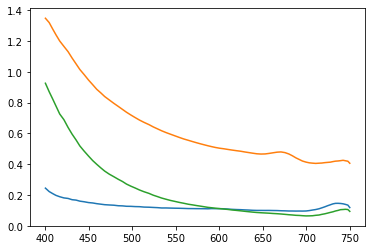

In [75]:
plt.plot(lambdaa, diwa[50])
plt.plot(lambdaa, hswholea[50])
plt.plot(lambdaa, hsfilta[50])

In [132]:
hspart = hswholea - np.median(hsfilta, axis=0)

(0.0, 1.5)

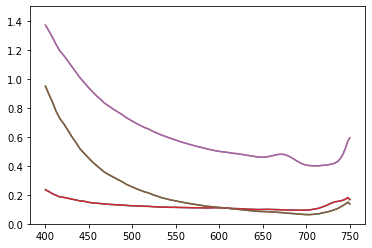

In [85]:
# plt.plot(a_wavelengths, diw_uns[50])
# plt.plot(a_wavelengths, hswhole_a_uns[50])
# plt.plot(a_wavelengths, hsfilt_a_uns[50])

plt.plot(a_wavelengths, np.median(diw_uns,axis=0))
plt.plot(a_wavelengths, np.median(hswhole_a_uns,axis=0))
plt.plot(a_wavelengths, np.median(hsfilt_a_uns,axis=0))

plt.plot(a_wavelengths, np.median(diw_uns,axis=0))
plt.plot(a_wavelengths, np.median(hswhole_a_uns,axis=0))
plt.plot(a_wavelengths, np.median(hsfilt_a_uns,axis=0))

plt.ylim(0,1.5)

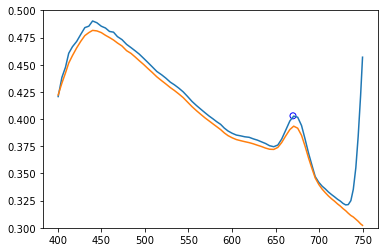

In [134]:
# subtract filtered from sample

hs_particulate = hswhole_a_uns - np.median(hsfilt_a_uns,axis=0)
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0))
plt.ylim(0.3,0.5)

plt.plot(a_wavelengths, np.median(hspart,axis=0))

plt.scatter(670,0.403, facecolor='None', edgecolor='b')

# then find the chl-a line height based on the Rosler et al paper

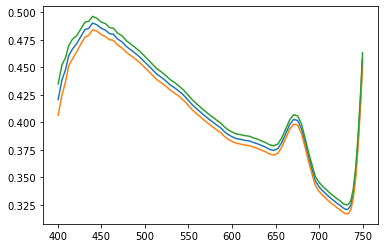

In [135]:
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0))
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0)-np.std(hs_particulate,axis=0))
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0)+np.std(hs_particulate,axis=0))

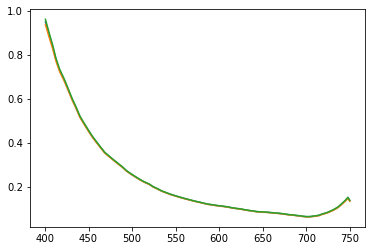

In [137]:
plt.plot(a_wavelengths, np.median(hsfilt_a_uns,axis=0))
plt.plot(a_wavelengths, np.median(hsfilt_a_uns,axis=0)-np.std(hsfilt_a_uns,axis=0))
plt.plot(a_wavelengths, np.median(hsfilt_a_uns,axis=0)+np.std(hsfilt_a_uns,axis=0))

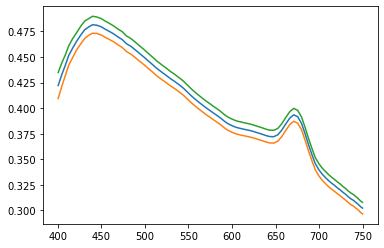

In [136]:
plt.plot(a_wavelengths, np.median(hspart,axis=0))
plt.plot(a_wavelengths, np.median(hspart,axis=0)-np.std(hspart,axis=0))
plt.plot(a_wavelengths, np.median(hspart,axis=0)+np.std(hspart,axis=0))

In [ ]:
# subtract filtered from sample

hs_particulate = hswhole_a_uns - np.median(hsfilt_a_uns,axis=0)
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0))
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0))
plt.plot(a_wavelengths, np.median(hs_particulate,axis=0))
plt.ylim(0.3,0.5)

plt.plot(a_wavelengths, np.median(hspart,axis=0))

plt.scatter(670,0.403, facecolor='None', edgecolor='b')

# then find the chl-a line height based on the Rosler et al paper

In [92]:
hspart_med = np.median(hs_particulate,axis=0)

a_wavelengths[55], a_wavelengths[68]

(661.6, 714.4)

In [98]:
hs_particulate.shape

(265, 81)

In [102]:
hspart_med[55+2], a_wavelengths[57]

(0.4027306404653414, 670.8)

In [100]:
np.argmax(hspart_med[55:68])

2

In [99]:
np.max(hspart_med[55:68])

0.4027306404653414

In [115]:
from scipy import interpolate
line_height_slope = interpolate.interp1d([a_wavelengths[55], a_wavelengths[68]], 
                                         [hspart_med[55], hspart_med[68]])

In [118]:
line_height_slope(670.8)

array(0.37938565)

In [116]:
a_wavelengths[57]

670.8

In [119]:
(0.4027306404653414 - 0.37938565)/0.011

2.1222718604855806

In [167]:
np.savetxt("hs_particulate_dark_abs_corr.csv", hspart_med, delimiter=",")
np.savetxt("wavelengths_hs_particulate_dark_abs_corr.csv", a_wavelengths, delimiter=",")

In [ ]:
hspart_med.

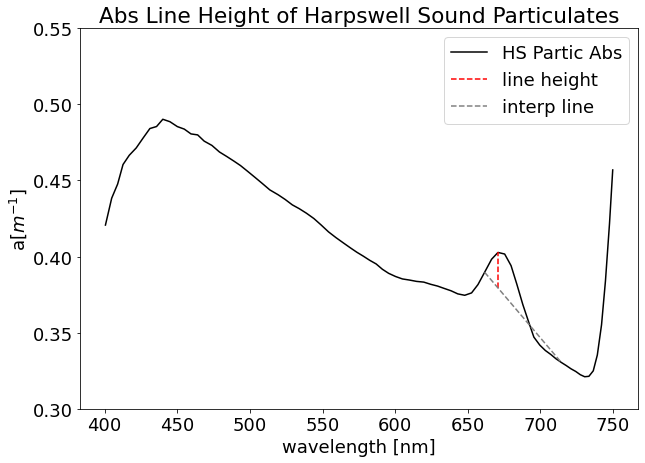

In [164]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(a_wavelengths, hspart_med, color='black', label='HS Partic Abs')
ax.set_ylim(0.3,0.55)

ax.plot([670.8,670.8], [0.37938565, 0.4027306404653414], color='red', linestyle='--', label='line height')
ax.plot([a_wavelengths[55], a_wavelengths[68]], [hspart_med[55], hspart_med[68]], 
        color='grey', linestyle='--', label='interp line')
ax.legend()
ax.set_ylabel('a[$m^{-1}$]')
ax.set_xlabel('wavelength [nm]')
ax.set_title('Abs Line Height of Harpswell Sound Particulates')

fig.savefig('abs_line_height.png',dpi=250)